## Implementing Word Embedding using NLTK

Importing the necessary libraries

In [1]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
# imports the TruncatedSVD class from scikit-learn, which is used for dimensionality reduction via Singular Value Decomposition (SVD)
from sklearn.decomposition import TruncatedSVD
# imports the TSNE class from scikit-learn, which is used for t-Distributed Stochastic Neighbor Embedding (t-SNE), a technique for dimensionality reduction and visualization.
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
# Sample texts
texts = [
    "Word embeddings are a type of word representation that allows words to be represented as vectors in a continuous vector space.",
    "These word vectors capture semantic meaning and relationships between words.",
    "Word embeddings are used in various natural language processing applications such as sentiment analysis, language translation, and named entity recognition."
]

Preprocessing the text

In [3]:
# Tokenization and preprocessing
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalnum()]
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return " ".join(tokens)

preprocessed_texts = [preprocess_text(text) for text in texts]

Perform word vectorisation using TF-IDF

In [4]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(preprocessed_texts)

This step initializes a TruncatedSVD object with the number of components equal to the number of features in the TF-IDF vectors

In [5]:
# Performs dimensionality reduction using TruncatedSVD
svd = TruncatedSVD(n_components=X.shape[1])
X_reduced = svd.fit_transform(X)

t-SNE is a technique for dimensionality reduction and visualization that aims to map high-dimensional data to a lower-dimensional space, typically 2 or 3 dimensions.
Perplexity represents the number of close neighbors each point has.

In [6]:
# Visualize using t-SNE
tsne = TSNE(n_components=2, perplexity=2, random_state=42)
X_embedded = tsne.fit_transform(X_reduced)

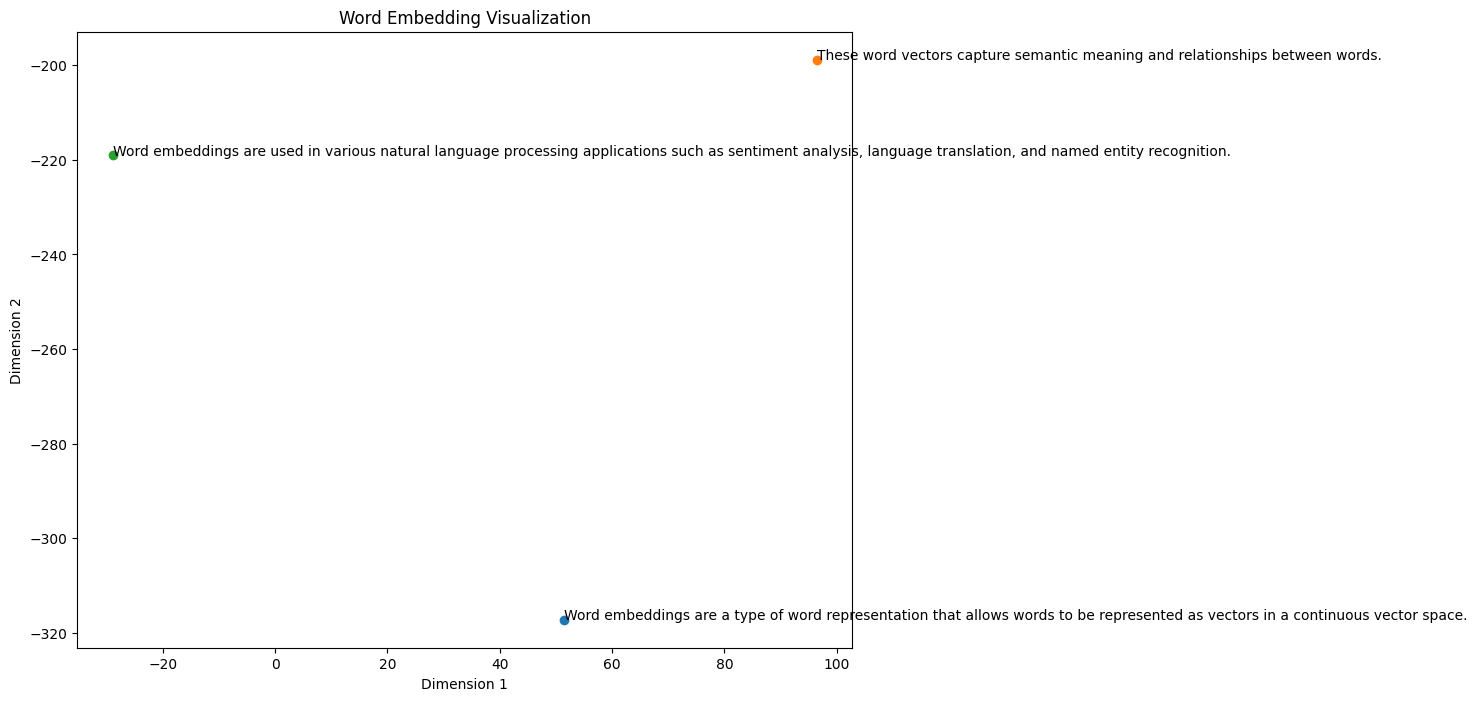

In [7]:
# Plot
plt.figure(figsize=(10, 8))
for i, txt in enumerate(texts):
    plt.scatter(X_embedded[i, 0], X_embedded[i, 1])
    plt.annotate(txt, (X_embedded[i, 0], X_embedded[i, 1]))
plt.title('Word Embedding Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

## Implementing word embedding using spaCy

Importing necessary libraries

In [8]:
import spacy
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

# Load the English language model
nlp = spacy.load("en_core_web_md")

In [9]:
# Sample texts
texts = [
    "Word embeddings are a type of word representation that allows words to be represented as vectors in a continuous vector space.",
    "These word vectors capture semantic meaning and relationships between words.",
    "Word embeddings are used in various natural language processing applications such as sentiment analysis, language translation, and named entity recognition."
]

Preprocess the text

In [10]:
# Process the texts and get word vectors
word_vectors = []
for text in texts:
    doc = nlp(text)
    text_vectors = [token.vector for token in doc if token.has_vector]
    word_vectors.extend(text_vectors)

Convert the text into numpy array and visualize using t-SNE



In [11]:
# Convert word_vectors to a NumPy array
word_vectors = np.array(word_vectors)

# Visualize using t-SNE
tsne = TSNE(n_components=2, random_state=42)
word_vectors_embedded = tsne.fit_transform(word_vectors)

Plotting the graph

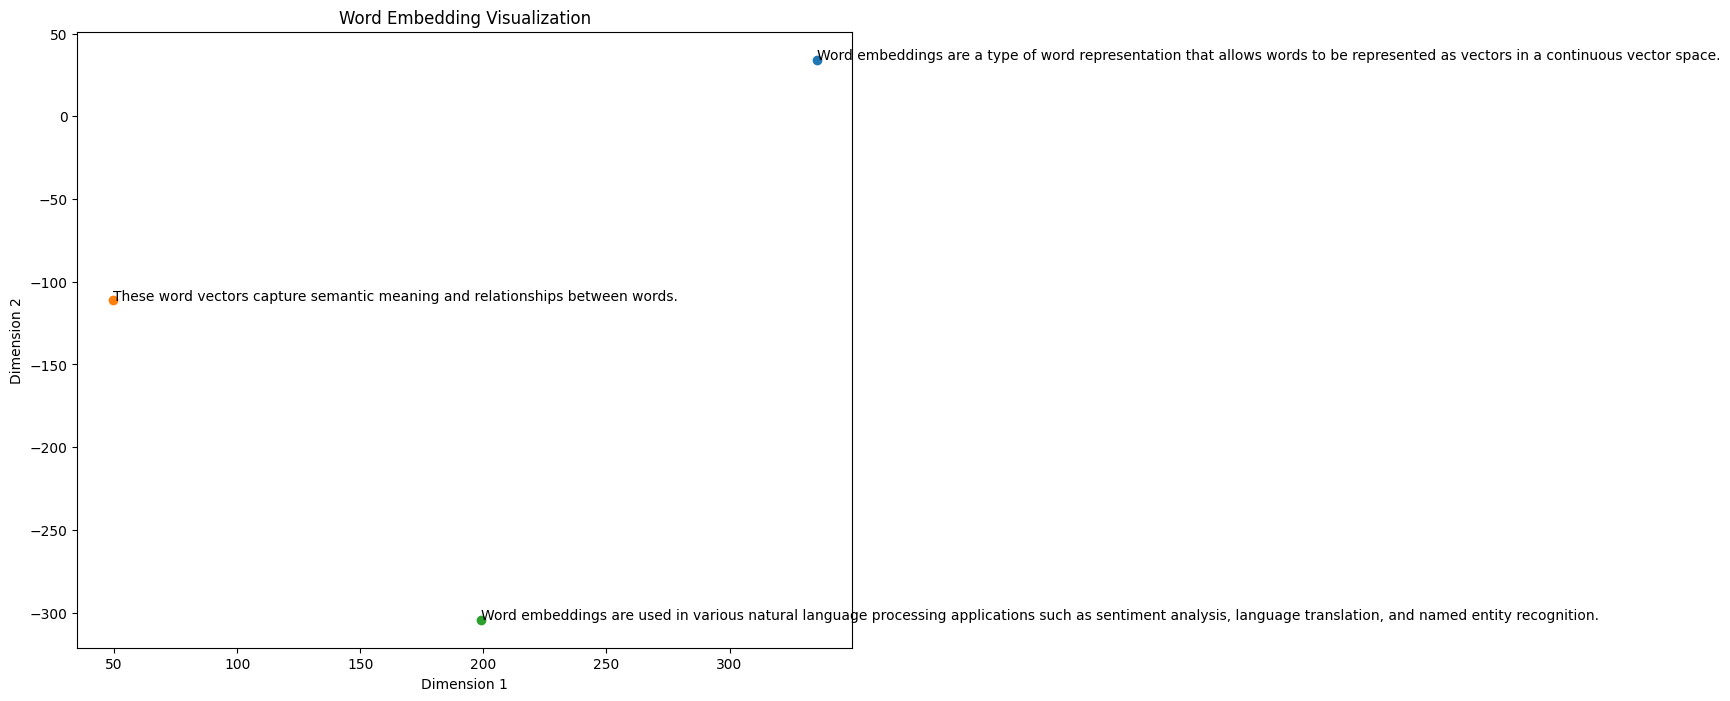

In [12]:
# Plot
plt.figure(figsize=(10, 8))
for i, vec in enumerate(word_vectors_embedded):
    if i < len(texts):  # Check if the index is within the range of texts
        plt.scatter(vec[0], vec[1])
        plt.annotate(texts[i], (vec[0], vec[1]))
plt.title('Word Embedding Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()